# House Price Prediction

This dataset contains house sale prices for King County, Seattle. It includes homes sold between May 2014 and May 2015.

##### Data file: kc_house_data.csv

**Columns Description**

- id - A notation for a house (Sequence Number)
- date - Date house was sold
- price - Price of the house (prediction target)
- bedrooms - Number of Bedrooms/House
- bathrooms - Number of bathrooms/House
- sqft_living - Square footage of the home
- sqft_lot - Square footage of the lot
- floors - Total floors (levels) in house
- waterfront - House which has a view to a waterfront
- view - Has a view or not
- condition - How good the condition is ( Overall )
- grade - Overall grade given to the housing unit, based on King County grading system
- sqft_above - Square footage of house apart from basement
- sqft_basement - Square footage of the basement
- yr_built - Built Year
- yr_renovated - Year when house was renovated
- zipcode - zip
- lat - Latitude coordinate
- long - Longitude coordinate
- sqft_living15 - Living area of 15 surrounding this house.
- sqft_lot15 - LotSize of 15 surrounding this house.

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

### Step1 : Load the dataset

In [83]:
houses_df = pd.read_csv( "../tutorials/data/kc_house_data.csv" )

In [84]:
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Step 2: Select few variables for analysis

Creat a new dataframe with only the following selected variables

- price
- bedrooms
- bathrooms
- sqft_living
- sqft_lot
- floors
- sqft_above
- sqft_basement
- sqft_living15
- sqft_lot15
- zipcode

In [85]:
houses_df = houses_df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','sqft_living15',
          'sqft_lot15','zipcode']]

In [86]:
houses_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15',
       'zipcode'],
      dtype='object')

### Step 4: Create a heatmap to understand which variables are highly correlated with price

In [87]:
corr_mat = houses_df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','sqft_living15',
          'sqft_lot15','zipcode']].corr()

In [88]:
corr_mat

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15,zipcode
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.605567,0.323816,0.585379,0.082447,-0.053203
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,0.477600,0.303093,0.391638,0.029244,-0.152668
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.685342,0.283770,0.568634,0.087175,-0.203866
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.876597,0.435043,0.756420,0.183286,-0.199430
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.183512,0.015286,0.144608,0.718557,-0.129574
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.523885,-0.245705,0.279885,-0.011269,-0.059121
sqft_above,0.605567,0.477600,0.685342,0.876597,0.183512,0.523885,1.000000,-0.051943,0.731870,0.194050,-0.261190
sqft_basement,0.323816,0.303093,0.283770,0.435043,0.015286,-0.245705,-0.051943,1.000000,0.200355,0.017276,0.074845
sqft_living15,0.585379,0.391638,0.568634,0.756420,0.144608,0.279885,0.731870,0.200355,1.000000,0.183192,-0.279033
sqft_lot15,0.082447,0.029244,0.087175,0.183286,0.718557,-0.011269,0.194050,0.017276,0.183192,1.000000,-0.147221


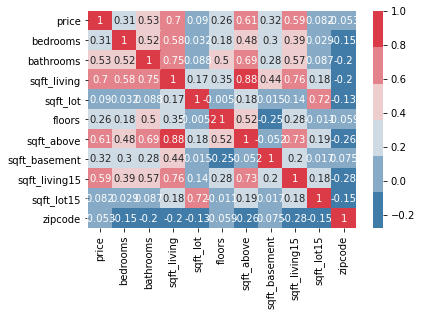

In [89]:
sn.heatmap(corr_mat,
           annot=True,
           cmap = sn.diverging_palette(240, 10));

### Step 5: Encode zipcode variable

Tips:


1. old_df = house_df[ all featues listed in step 2 + zipcode ]

2. new_df = pd.get_dummies( old_df, columns = ['zipcode'] )

3. Then split the new_df into train and test sets using 80:20 ratio

In [90]:
houses_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15',
       'zipcode'],
      dtype='object')

In [91]:
encoded_houses_df = pd.get_dummies(data=houses_df,columns=['zipcode'])

In [92]:
encoded_houses_df.sample(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
2779,275000.0,3,2.50,1730,5799,2.0,1730,0,1710,6490,...,0,0,0,0,0,0,0,0,0,0
15836,1160000.0,4,2.50,3860,10361,2.0,2940,920,3720,13155,...,0,0,0,0,0,0,0,0,0,0
12552,312000.0,2,1.75,1160,8625,1.0,1160,0,960,5750,...,0,0,0,0,0,0,0,0,0,0
2162,280000.0,3,2.50,1860,6607,2.0,1860,0,1760,6766,...,0,0,0,0,0,0,0,0,0,0
15509,269500.0,2,1.00,800,1200,2.0,800,0,806,1200,...,0,0,0,0,0,0,0,0,0,0


In [113]:
encoded_houses_df.shape

(21613, 80)

### Step 6: Set X and Y Variables

Note: We are going to build a linear model to predict the price of the house using other variables

- *price* will Y variable.
- All other variables will be X variables.

In [93]:
X = encoded_houses_df
y = houses_df['price']

### Step 7: Split the dataset: 80% as training and 20% as test set

Note: Use random state as 100

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=100)

In [96]:
X_train.shape

(17290, 80)

In [97]:
X_train.sample(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
8144,250000.0,3,2.0,1900,6660,1.0,950,950,1690,8111,...,0,0,0,0,0,0,0,0,0,0
18826,760000.0,3,2.5,4040,147856,2.0,4040,0,3000,125452,...,0,0,0,0,0,0,0,0,0,0
13240,410000.0,2,1.0,2020,7540,1.0,1010,1010,1270,4652,...,0,0,0,0,0,0,0,0,0,0
10111,1365000.0,3,2.5,2090,6000,1.5,2090,0,2730,6000,...,0,0,0,0,0,0,0,0,0,0
1213,245000.0,3,2.5,1600,4271,2.0,1600,0,1520,3225,...,0,0,0,0,0,0,0,0,0,0


In [114]:
X_test.shape

(4323, 80)

In [119]:
y_train.sample(5)

20873    375000.0
9479     155000.0
8075     308000.0
12691    689000.0
19765    390000.0
Name: price, dtype: float64

In [120]:
y_test.sample(5)

7057      490000.0
3519     2095000.0
21203     461100.0
20754     790000.0
18481     210000.0
Name: price, dtype: float64

### Step 8: Build a linear regression model using training set

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
lreg_v1 = LinearRegression()

In [121]:
lreg_v1.fit(X_train, y_train)

LinearRegression()

In [122]:
lreg_v1.intercept_

-5.911802873015404e-06

In [123]:
lreg_v1.coef_

array([ 1.00000000e+00,  7.73181785e-12, -1.62990466e-11,  8.43661421e-02,
        2.16117938e-16,  2.00485843e-11, -8.43661421e-02, -8.43661421e-02,
       -3.55798476e-15,  1.38777878e-17,  5.91194006e-06,  5.91191901e-06,
        5.91193812e-06,  5.91193762e-06,  5.91194070e-06,  5.91193961e-06,
        5.91193941e-06,  5.91193696e-06,  5.91193978e-06,  5.91194078e-06,
        5.91194133e-06,  5.91194190e-06,  5.91193927e-06,  5.91194035e-06,
        5.91193772e-06,  5.91194265e-06,  5.91193961e-06,  5.91194387e-06,
        5.91194044e-06,  5.91194302e-06,  5.91194158e-06,  5.91193816e-06,
        5.91193837e-06,  5.91194157e-06,  5.91191794e-06,  5.91193705e-06,
        5.91194183e-06,  5.91194013e-06,  5.91194310e-06,  5.91194301e-06,
        5.91194332e-06,  5.91193875e-06,  5.91194217e-06,  5.91193741e-06,
        5.91194335e-06,  5.91193822e-06,  5.91194215e-06,  5.91201597e-06,
        5.91194167e-06,  5.91194293e-06,  5.91194189e-06,  5.91194060e-06,
        5.91193999e-06,  

In [125]:
dict(zip(X_train.columns, np.round(lreg_v1.coef_, 8)))

{'price': 1.0,
 'bedrooms': 0.0,
 'bathrooms': -0.0,
 'sqft_living': 0.08436614,
 'sqft_lot': 0.0,
 'floors': 0.0,
 'sqft_above': -0.08436614,
 'sqft_basement': -0.08436614,
 'sqft_living15': -0.0,
 'sqft_lot15': 0.0,
 'zipcode_98001': 5.91e-06,
 'zipcode_98002': 5.91e-06,
 'zipcode_98003': 5.91e-06,
 'zipcode_98004': 5.91e-06,
 'zipcode_98005': 5.91e-06,
 'zipcode_98006': 5.91e-06,
 'zipcode_98007': 5.91e-06,
 'zipcode_98008': 5.91e-06,
 'zipcode_98010': 5.91e-06,
 'zipcode_98011': 5.91e-06,
 'zipcode_98014': 5.91e-06,
 'zipcode_98019': 5.91e-06,
 'zipcode_98022': 5.91e-06,
 'zipcode_98023': 5.91e-06,
 'zipcode_98024': 5.91e-06,
 'zipcode_98027': 5.91e-06,
 'zipcode_98028': 5.91e-06,
 'zipcode_98029': 5.91e-06,
 'zipcode_98030': 5.91e-06,
 'zipcode_98031': 5.91e-06,
 'zipcode_98032': 5.91e-06,
 'zipcode_98033': 5.91e-06,
 'zipcode_98034': 5.91e-06,
 'zipcode_98038': 5.91e-06,
 'zipcode_98039': 5.91e-06,
 'zipcode_98040': 5.91e-06,
 'zipcode_98042': 5.91e-06,
 'zipcode_98045': 5.91e-06

### Step 9: Predict price on test set

In [127]:
y_pred = lreg_v1.predict(X_test)

In [105]:
type(y_pred)

numpy.ndarray

In [128]:
y_df = pd.DataFrame({"actual": y_test,
                     "predicted": y_pred,
                     "residual": y_pred - y_test})

In [129]:
y_df.sample(10)

,actual,predicted,residual
14557,350000.0,350000.0,5.820766e-11
14240,862500.0,862500.0,1.164153e-10
13954,733000.0,733000.0,0.000000e+00
11622,373000.0,373000.0,1.746230e-10
6184,639000.0,639000.0,-1.164153e-10
18481,210000.0,210000.0,1.746230e-10
10177,1400000.0,1400000.0,0.000000e+00
2504,475000.0,475000.0,5.820766e-11
13076,931000.0,931000.0,0.000000e+00
12467,728000.0,728000.0,0.000000e+00


### Step 10: Calculate RMSE

In [108]:
from sklearn.metrics import mean_squared_error, r2_score

In [109]:
mse_v1 = mean_squared_error(y_test, y_pred)

In [110]:
mse_v1

9.834389528186682e-21

In [111]:
rmse_v1 = np.sqrt(mse_v1)

In [130]:
rmse_v1

9.916849060153474e-11

### Step 11: Calculate RMSE

### Step 12: Verify the R-squared for linear model using K Fold Cross Validation

Note: Use cv=10